<H2>Linear Regression</H2>
<p>Data from <a href="https://archive.ics.uci.edu/ml/datasets.html">UCI Machine Learning Data repository</a></p>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Get Column Names from file on UCI Datasets
names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
# Import text file as table using pd.read_table, delim_whitespace, specify names
data = "Data\\cars\\auto-mpg.data.txt"
cars = pd.read_table(os.path.relpath(data),delim_whitespace=True, names=names)
# Drop missing values from 'horsepower' (missing vals are '?')
cleaned_cars = cars[cars['horsepower']!='?']
float_hp = cleaned_cars['horsepower'].astype(float)
cleaned_cars['horsepower'] = float_hp

print(cleaned_cars.shape)
cleaned_cars.head()


                     

(392, 9)


C:\Users\v-haharv\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


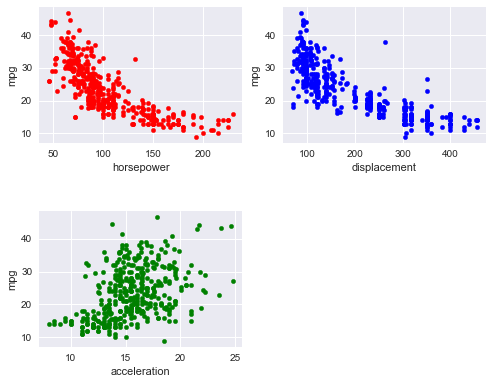

In [2]:
"""Do some scatter plots to get a sense of the data"""
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
fig.subplots_adjust(hspace=.5)

cleaned_cars.plot("horsepower","mpg",kind="scatter",ax=ax1,c='r')
cleaned_cars.plot('displacement','mpg',kind='scatter',ax=ax2,c='b')
cleaned_cars.plot('acceleration','mpg',kind='scatter',ax=ax3,c='g')

plt.show()



<h3>Linear relationships</h3>
<p>See the <a href="https://en.wikipedia.org/wiki/Linear_regression">Wikipedia Article on Linear Regression</a> for details. This will be a simple linear regression that will fit using one input and one output. However the scikitlearn LinearRegression class can handle multiple inputs</p>
<h4>Using scikitlearn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression class:</a></h4>
<p>To fit a LinearRegression class takes we use ````lr.fit(input, output)```` which ````inputs```` a NumPy matrix with ````n_samples```` rows and ````n_features```` columns. In order to use pandas DataFrame values, we can't just use ````df['col']```` cuz that's a series object, nor can we use ````df['col'].values```` because that results in a n_rows x 0 columns array. You can get around this using double brackets: ````df[['col']].values```` which results in the desired n_rows by 1 col array</p>

In [3]:
# Import LinearRegression class
from sklearn.linear_model import LinearRegression
# Create instance of class
lr = LinearRegression()
# Fit model REMEMBER: use double brackets to create n_cols x n_rows matrix
# For the output (2nd argument), you don\'t need to use double brackets cuz the dimensionality of predicted vals is 1
lr.fit(cleaned_cars[['horsepower']], cleaned_cars["mpg"].values)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h2>Making Predictions and Evaluating Linear Models</h2>
<p>With a trained linear regression model, the first step in seeing whether it sucks or not is to use it to predict the actual values that it was just trained on. If this works, then bingo, you found the correct (maybe) feature to predict your target. If it doesn't then you know the model is underfit, that is, it doesn't even perform well on the data it was fit on</p>

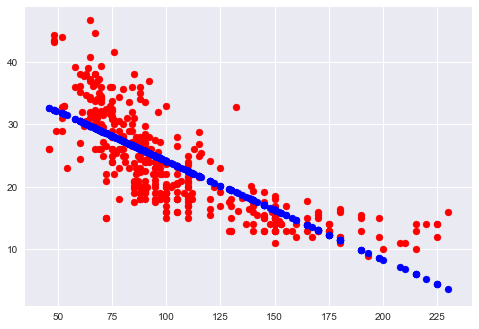

In [4]:
# Use the input values that trained the model to predict the target
predictions = lr.predict(cleaned_cars[['horsepower']].values)
# Plot the performance of the feature against the actual data
plt.scatter(cleaned_cars.horsepower,cleaned_cars.mpg,c='r')
plt.scatter(cleaned_cars.horsepower,predictions,c='b')
plt.show()

<H2>Error Metrics</H2>
<p>One error metric for regression is <a href="https://en.wikipedia.org/wiki/Mean_squared_error">mean squared error</a> which (much like basically everything in stats) is a mean difference between the predicted and actual values</p>
<p>You compute the squared error by taking the squared difference between each predicted and actual value:</p>
<p>$(\hat{Y_{i}} - Y_{i})^{2}$</p>
<p>Where $\hat{Y_{i}}$ is the predicted value and $Y_{i}$ is the actual value</p>
<p>Then, the mean of squared errors is computed (like all other means are computed):</p>
<p>$MSE=\frac{1}{n}\sum_{i=1}^{n}(\hat{Y_{i}}-Y_{i})^{2}$</p>
<p>In pseudo-code:</p>
<p>````sum = 0
    for each data point:
        diff = predicted_value - actual_value
        squared_diff = diff**2
        sum += squared_diff
    mse = sum/n````</p>
<p>And accordingly (think variance/standard deviation here), $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{Y_{i}}-Y_{i})^{2}}$ gives the root mean squared error, which gives the error in the same units as the data.</p>
<p>In scikit-learn, we can use the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error">mean_squared_error</a> function to accomplish this:</p>


In [5]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
# Calc mse
mse = mean_squared_error(cleaned_cars.mpg, predictions)
print('mean squared error: mpg-squared')
print(mse)
#Calc Root Mean Squared Error
rmse = mse**.5
print('root mean squared error: mpg')
print(rmse)

mean squared error: mpg-squared
23.9436629386
root mean squared error: mpg
4.89322623007
